<a href="https://colab.research.google.com/github/NovakMateusz/crispy-sentiment-ml/blob/master/notebooks/IMDB/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Imports


In [ ]:
%matplotlib inline

import pathlib
import re

from google.colab import drive
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import  word_tokenize
import numpy as np
import pandas as pd


plt.rcParams["figure.figsize"] = (16, 8)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Parsing functions

In [ ]:
def remove_HTML_tags(text: str) -> str:
  return re.sub('<[^<]+?>', "", text)

### Mounting Google Drive and setting up paths

In [ ]:
drive.mount('/content/drive')

COLAB_ROOT_DIR = pathlib.Path('.')
DRIVE_ROOT_DIR = COLAB_ROOT_DIR / 'drive/MyDrive'
PROJECT_ROOT_DIR = DRIVE_ROOT_DIR / 'bachelors_dissertation'

DATA_DIR = PROJECT_ROOT_DIR / 'data'
RAW_DATA_DIR = DATA_DIR / 'raw'
CLEAN_DATA_DIR = DATA_DIR / 'clean'

MODELS_DIR = PROJECT_ROOT_DIR / 'models'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading and presenting the raw data

In [ ]:
df = pd.read_csv(RAW_DATA_DIR / 'IMDB' /  'IMDB_50K.csv')
df.rename(columns={'sentiment': 'label', "review": 'text'}, inplace=True);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.head()

,text,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Dropping possible duplicates

In [ ]:
duplicates_count = df.duplicated().sum()
if duplicates_count:
    print(f'Number of duplicated rows: {duplicates_count}')
    df.drop_duplicates(inplace=True, ignore_index=True)

Number of duplicated rows: 418


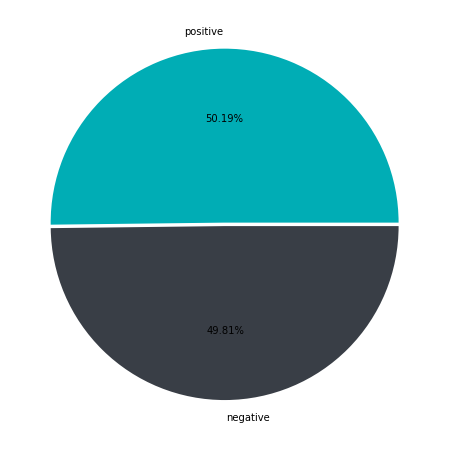

In [ ]:
plt.pie(df['label'].value_counts(), autopct='%.2f%%', explode=[0.01,0.01], colors=['#00ADB5', '#393E46'], labels=df['label'].unique())
plt.show()

### Removing HTML tags from review

In [ ]:
df['text'] = df['text'].apply(remove_HTML_tags)

### Counting words in review

In [ ]:
df['words_count'] = df['text'].apply(lambda text: len(word_tokenize(text)))

In [ ]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-inf']

df['words_count_bins'] = pd.cut(df['words_count'], bins=bins, labels=labels)

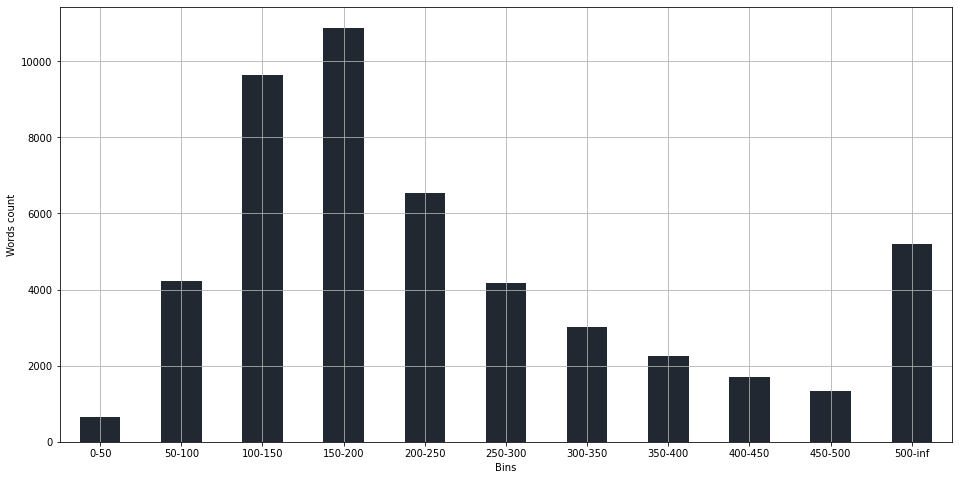

In [ ]:
df['words_count_bins'].value_counts().sort_index().plot(kind='bar', rot=0, grid=True, color=['#222831'])
plt.ylabel('Words count')
plt.xlabel('Bins')
plt.show()

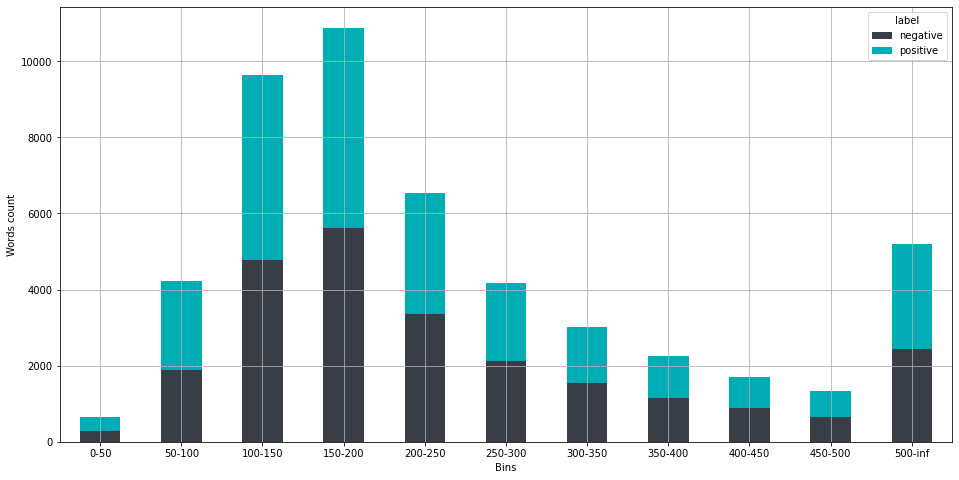

In [ ]:
df.groupby(['words_count_bins', 'label'])['label'].count().unstack().plot(kind='bar', rot=0, stacked=True, grid=True, color=['#393E46', '#00ADB5'])
plt.ylabel('Words count')
plt.xlabel('Bins')
plt.show()

Data looks balanced, positive to negative reviews have a similar ratio, even in bins where reviews are separated based on the count of words in review numbers look similar.

### Changing labels from textual to a numerical value, where the value "positive" equals 1, and "negative" equals 0

In [ ]:
df['label'] = df['label'].apply(lambda text: 1 if text == 'positive' else 0)

In [ ]:
final_df = df[['text', 'label']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49582 entries, 0 to 49581
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    49582 non-null  object
 1   label   49582 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 774.8+ KB


### Save clean data to csv

In [ ]:
final_df.to_csv(CLEAN_DATA_DIR / 'IMDB' / 'IMDB_50K_clean.csv', index=False)